## Fake news Detection 

#### Fake news refers to misinformation or disinformation spread through word of mouth,media or digital channels such as edited videos/pics,memes,unverified sources and social media rumours or deep fake videos. 
Fake news has become a serious problem with potential of resulting in mob violence, public shame or any kind of social stigma. Or even propaganda like favouring politicians in elections or spreading inflammatory messages of terrorists,crimes etc.

Many examples  are there in the past and currently .The problem statement dataset has been taken from kaggle Dataset :https://www.kaggle.com/pnkjgpt/fake-news-dataset

### Data science project Documentation

The Data Science Method

<b>1.Problem Identification</b>

<b>2.Data Wrangling</b>
* Data Collection
    - Locating the data
    - Data loading
    - Data joining
* Data Organization
    - File structure
    - Git & Github
* Data Definition
    * Column names
    - Data types (numeric, categorical, timestamp, etc.)
    - Description of the columns
    - Count or percent per unique values or codes (including NA)
    - The range of values or codes
* Data Cleaning
    * NA or missing data
    - Duplicates

<b>3.Exploratory Data Analysis</b>

- Build data profile tables and plots
- Outliers & Anomalies
- Explore data relationships
- Identification and creation of features

<b>4.Pre-processing and Training Data Development</b>

- Create dummy or indicator features for categorical variables
- Standardize the magnitude of numeric features
- Split into testing and training datasets
- Apply scaler to the testing set

<b>5.Modeling</b>

- Fit Models with Training Data Set
- Review Model Outcomes — Iterate over additional models as needed.
- Identify the Final Model

<b>6.Documentation </b>

- Review the Results
- Present and share your findings - storytelling
- Finalize Code
- Finalize Documentation

## 1.Problem Identification

#### To predict whether a news is fake or real

## 2.Data Wrangling

### 2.1 Import required libraries

In [63]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud, STOPWORDS
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### 2.2 Data Collection
- Locating the data
- Data loading
- Data joining

In [64]:
#locating the dataset
import os
print(os.name)
print(os.getcwd())
print(os.listdir())

nt
C:\Users\Sanjay\3datascienceprojects\datascienceprojects\NLP\Fake News\fake_news_detection\notebooks
['.gitkeep', '.ipynb_checkpoints', 'Fake News detection.ipynb', 'fakenews2.ipynb', 'fake_news_train_data_eda.html', 'pipeline.sav']


###  Here cookiecutter template is used for organing projects directories and files.

In [65]:
#loading  the datasets
data_set_path =("C:/Users/Sanjay/3datascienceprojects/datascienceprojects/NLP/Fake News/fake_news_detection/data/raw/")

fake_news_train_data = pd.read_csv(data_set_path+"train.csv")
fake_news_test_data =pd.read_csv(data_set_path+'test.csv')

In [66]:
fake_news_train_data.info()   #train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       40000 non-null  int64 
 1   title       40000 non-null  object
 2   text        40000 non-null  object
 3   subject     40000 non-null  object
 4   date        40000 non-null  object
 5   class       40000 non-null  object
 6   Unnamed: 6  1 non-null      object
dtypes: int64(1), object(6)
memory usage: 2.1+ MB


In [67]:
fake_news_test_data.info() ### test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    4000 non-null   int64 
 1   title    4000 non-null   object
 2   text     4000 non-null   object
 3   subject  4000 non-null   object
 4   date     4000 non-null   object
dtypes: int64(1), object(4)
memory usage: 156.4+ KB


In [68]:
print("Fake news dataset to be trained for fake or real news:",fake_news_train_data.shape)  ## train dataset
print("Test dataset to be predict the news is fake or real:", fake_news_test_data.shape)  ## test dataset

Fake news dataset to be trained for fake or real news: (40000, 7)
Test dataset to be predict the news is fake or real: (4000, 5)


####  Train dataset has 40k rows and 7 columns while test data has 4k rows and 5 columns

In [69]:
fake_news_test_data.columns

Index(['index', 'title', 'text', 'subject', 'date'], dtype='object')

In [70]:
fake_news_train_data.head()

,index,title,text,subject,date,class,Unnamed: 6
0,0,PRESIDENT TRUMP Explains New “America First” R...,That s what we re talking about! Another campa...,politics,"Aug 2, 2017",Fake,NaN
1,1,TERMINALLY ILL FORMER MISS WI: “Until my last ...,How is it that Sean Hannity is the only media ...,politics,"Oct 4, 2016",Fake,NaN
2,2,Cruz Humiliated By Moderator After Lie About ...,Almost immediately after learning that longtim...,News,"February 13, 2016",Fake,NaN
3,3,"Russia revels in Trump victory, looks to sanct...",MOSCOW (Reuters) - For all their mutual praise...,politicsNews,"November 9, 2016",Real,NaN
4,4,Trump's bid to open U.S. monuments to developm...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"May 26, 2017",Real,NaN


In [71]:
fake_news_train_data.head(5).T

,0,1,2,3,4
index,0,1,2,3,4
title,PRESIDENT TRUMP Explains New “America First” R...,TERMINALLY ILL FORMER MISS WI: “Until my last ...,Cruz Humiliated By Moderator After Lie About ...,"Russia revels in Trump victory, looks to sanct...",Trump's bid to open U.S. monuments to developm...
text,That s what we re talking about! Another campa...,How is it that Sean Hannity is the only media ...,Almost immediately after learning that longtim...,MOSCOW (Reuters) - For all their mutual praise...,WASHINGTON (Reuters) - The Trump administratio...
subject,politics,politics,News,politicsNews,politicsNews
date,"Aug 2, 2017","Oct 4, 2016","February 13, 2016","November 9, 2016","May 26, 2017"
class,Fake,Fake,Fake,Real,Real
Unnamed: 6,NaN,NaN,NaN,NaN,NaN


In [72]:
fake_news_train_data.describe()

,index
count,40000.00000
mean,19999.50000
std,11547.14972
min,0.00000
25%,9999.75000
50%,19999.50000
75%,29999.25000
max,39999.00000


In [73]:
fake_news_train_data.isna().sum()

index             0
title             0
text              0
subject           0
date              0
class             0
Unnamed: 6    39999
dtype: int64

In [74]:
fake_news_train_data.title[0:5]

0    PRESIDENT TRUMP Explains New “America First” R...
1    TERMINALLY ILL FORMER MISS WI: “Until my last ...
2     Cruz Humiliated By Moderator After Lie About ...
3    Russia revels in Trump victory, looks to sanct...
4    Trump's bid to open U.S. monuments to developm...
Name: title, dtype: object

In [75]:
fake_news_train_data.text[0] #first text contents

'That s what we re talking about! Another campaign promise kept. No wonder the Democrats and their media allies fear President Trump. When is the last time a politician actually followed through on a promise they made to the American voters that helped them to get elected?President Trump joined two Republican senators on Wednesday to champion legislation overhauling legal immigration in America, calling for a merit-based system that would significantly cut admissions over the next decade.Speaking at the White House, the president called it  the most significant reform to our immigration system in a half century. As a candidate, I campaigned on creating a merit-based immigration system that protects U.S. workers and taxpayers, and that is why we are here today,  Trump said.He was joined by Georgia Sen. David Perdue and Arkansas Sen. Tom Cotton, the Republicans who first introduced the Reforming American Immigration for a Strong Economy, or the RAISE Act, in February. They have said the 

In [76]:
fake_news_train_data.subject.nunique()

9

In [77]:
fake_news_train_data.subject.unique()
#print(pd.unique(fake_news_train_data['subject']))

array(['politics', 'News', 'politicsNews', 'Government News', 'worldnews',
       'left-news', 'Middle-east', 'US_News',
       'Donald Trump s Muslim ban is proving to be a lot more difficult and a lot less constitutional than his followers hope. While two courts in a row have struck Trump down, even Mitch McConnell is seeing the writing on the wall. He said on Sunday that the Senate will not defend Trump s questionably constitutional Muslim ban.On CNN s State of the Union, McConnell was asked about a couple of Trump s latest, including Trump s defense of Russian President Vladimir Putin s record of assassinating his political enemies, to which Trump essentially shrugged his shoulders and said that the United States does it too. McConnell called Putin  a thug  and then, without a shred of irony in his voice, complained that Putin wasn t legitimately elected.The subject then turned to Trump s claim that he only lost the popular vote because more than 3 million undocumented people voted

#### Explore fake news test data 

In [78]:
print(fake_news_train_data.isnull().sum())
print('************')
print(fake_news_test_data.isnull().sum())

index             0
title             0
text              0
subject           0
date              0
class             0
Unnamed: 6    39999
dtype: int64
************
index      0
title      0
text       0
subject    0
date       0
dtype: int64


#### There is no any null values in both dataset

In [79]:
test =fake_news_test_data.copy()
train = fake_news_train_data.copy()

test['total']=fake_news_test_data['title']+' '+fake_news_test_data['text']
train['total']=fake_news_train_data['title']+' '+fake_news_train_data['text']

In [80]:
test[['total']]

,total
0,STUNNING TESTIMONY On The Devastation Illegal ...
1,Pena Nieto told Trump Mexico won't pay for wal...
2,"Actor George Clooney: I Support Hillary, And ..."
3,AWESOME LETTER TO OBAMA: Who is unfit to be pr...
4,This Ridiculously Creepy Vine May Prove Ted C...
...,...
3995,WHERE’S THE OVERSIGHT? OBAMA FUNNELED BILLIONS...
3996,"Trump says he is 'very, very close' to making ..."
3997,NSA Chief On Trump’s Russia/US Cybersecurity ...
3998,Chris Christie Says Only Stupid Judges Will W...


In [81]:
test_top5=test.head(1000)

In [82]:
test_top5

,index,title,text,subject,date,total
0,0,STUNNING TESTIMONY On The Devastation Illegal ...,Fantastic testimony on the disastrous results...,Government News,"Mar 21, 2016",STUNNING TESTIMONY On The Devastation Illegal ...
1,1,Pena Nieto told Trump Mexico won't pay for wal...,MEXICO CITY (Reuters) - Mexican President Enri...,politicsNews,"August 31, 2016",Pena Nieto told Trump Mexico won't pay for wal...
2,2,"Actor George Clooney: I Support Hillary, And ...",Hillary Clinton has picked up a huge endorseme...,News,"March 4, 2016","Actor George Clooney: I Support Hillary, And ..."
3,3,AWESOME LETTER TO OBAMA: Who is unfit to be pr...,Did anyone else think it was the ultimate iron...,left-news,"Aug 5, 2016",AWESOME LETTER TO OBAMA: Who is unfit to be pr...
4,4,This Ridiculously Creepy Vine May Prove Ted C...,There have been a lot of strange this that hav...,News,"February 8, 2016",This Ridiculously Creepy Vine May Prove Ted C...
...,...,...,...,...,...,...
995,995,Trump national security aide Flynn resigns ove...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"February 13, 2017",Trump national security aide Flynn resigns ove...
996,996,AWESOME! Conservative Artist Crashes Anti-Trum...,Our favorite conservative street artist Sabo c...,left-news,"Nov 13, 2017",AWESOME! Conservative Artist Crashes Anti-Trum...
997,997,"EU's Tusk, UK's May to talk Brexit next Tuesday",BRUSSELS (Reuters) - European Council Presiden...,worldnews,"September 19, 2017","EU's Tusk, UK's May to talk Brexit next Tuesda..."
998,998,Trump delays announcement on whether U.S. emba...,ABOARD AIR FORCE ONE (Reuters) - President Don...,worldnews,"December 4, 2017",Trump delays announcement on whether U.S. emba...


In [83]:
train_top5= train.head(2000)

In [84]:
type(train)

pandas.core.frame.DataFrame

In [85]:
train_top5[['total']]

,total
0,PRESIDENT TRUMP Explains New “America First” R...
1,TERMINALLY ILL FORMER MISS WI: “Until my last ...
2,Cruz Humiliated By Moderator After Lie About ...
3,"Russia revels in Trump victory, looks to sanct..."
4,Trump's bid to open U.S. monuments to developm...
...,...
1995,Trump EXPLODES After Jeff Sessions Gets Caugh...
1996,"In RARE Case Of Factual Reporting, Fox Shows ..."
1997,"Taiwan's new premier vows to 'build country', ..."
1998,Trump met Fed's Yellen in Fed chair search: Wh...


## 3.Exploratory Data Analysis

<b>pandas profiling</b> does helps in visualizing and understanding the distribution of each variable. 
It generates a report with all the information easily available


The main disadvantage of pandas profiling is its use with large datasets. With the increase in the size of the data the time to generate the report also increases a lot.

In [86]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(fake_news_train_data)
#prof.to_file(output_file='fake_news_train_data_eda.html')

In [87]:
#prof ## visualize the dataset

### creating word cloud

In [88]:
from wordcloud import WordCloud, STOPWORDS

In [89]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in train[train['class']=='Real'].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['class']=='Fake'].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "
    
 

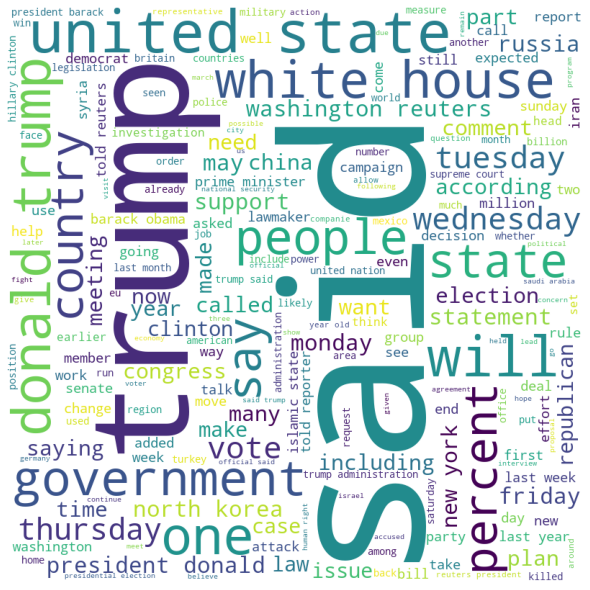

In [90]:
 #real words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(real_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
 

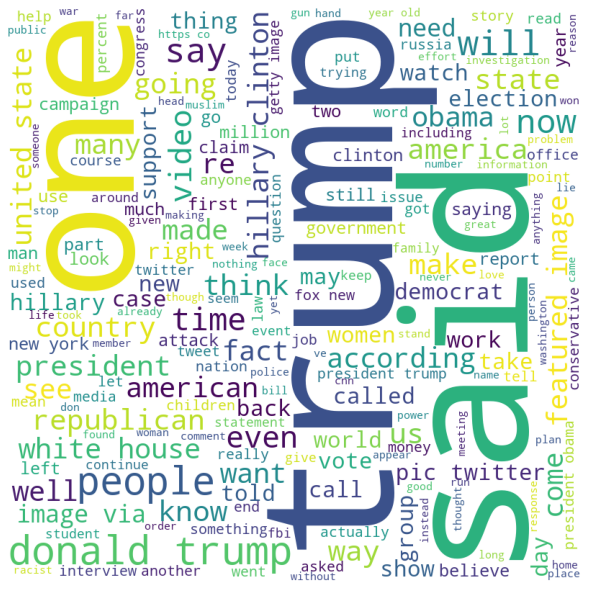

In [91]:
#fake words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
 

## 4.Pre-processing and Training Data Development

- Create dummy or indicator features for categorical variables
- Standardize the magnitude of numeric features
- Split into testing and training datasets
- Apply scaler to the testing set


### Cleaning and preprocessing

####  Using regex,Tokenization,StopWords,Lemmatization

In [92]:
#tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [93]:
#stopword
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [94]:
lemmatizer=WordNetLemmatizer()
for index,row in train_top5.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train_top5.loc[index,'total'] = filter_sentence


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [95]:
train_top5 = train_top5[['total','class']]

In [96]:
train_top5.total[1] ##2nd rows values , index starts from zero 

' terminally ill former miss wi until last breath i use voice tell mr trump really video how sean hannity medium personality able find amazing strong woman story every american voter hear trump really treat woman genuine concern othersformer miss wi mellissa young story heartbreaking admiration respect donald trump unmistakeable watch former vp trump international senada adzem former miss usa carrie prajean boller speak hannity'

In [97]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
X_train = train_top5['total']
Y_train = train_top5['class']

### Bag-of-words / CountVectorizer

In [99]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [100]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


### TF-iDF Vectorizer

In [101]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features                  
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [102]:
tfidf_features = vectorize_text(['hello how are you doing','hi i am doing fine'],30)

In [103]:
tfidf_features

array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

### applying  countVectorizer and tf-idf

In [104]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [105]:
tf_idf_matrix

<2000x39956 sparse matrix of type '<class 'numpy.float64'>'
	with 355374 stored elements in Compressed Sparse Row format>

In [106]:
test_counts = count_vectorizer.transform(test_top5['total'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

## 5.Modeling

- Fit Models with Training Data Set
- Review Model Outcomes — Iterate over additional models as needed.
- Identify the Final Model

HINTS: 
* Logistic Regression with Count Vectorizer
* Logistic Regression with TfidfVectorizer 
* Multinomial Naive Bayes with TfidfVectorizer
* PassiveAggressiveClassifier   
        

## Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [108]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Logistic classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
from sklearn.naive_bayes import MultinomialNB
cm = confusion_matrix(y_test, pred)
cm

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97


array([[265,   9],
       [  5, 221]], dtype=int64)

## MultinomialNB

In [109]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.97
Accuracy of NB classifier on test set: 0.93


array([[252,  22],
       [ 15, 211]], dtype=int64)

## PassiveAggressiveClassifier

In [123]:
X_train.shape


(1500, 39956)

In [124]:
X_test.shape

(500, 39956)

In [129]:
y_train.shape

(1500,)

In [127]:
y_test.shape

(500,)

## Prediction

In [134]:

result1 = logreg.predict(X_test)
result1

array(['Real', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Real',
       'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Real',
       'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Real', 'Fake', 'Fake',
       'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Real',
       'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Real', 'Fake', 'Fake',
       'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Real', 'Fake', 'Real',
       'Real', 'Fake', 'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Fake',
       'Real', 'Real', 'Fake', 'Fake', 'Real', 'Real', 'Fake', 'Fake',
       'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake',
       'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Real', 'Fake',
       'Real', 'Fake', 'Real', 'Fake', 'Real', 'Real', 'Fake', 'Real',
       'Real', 'Real', 'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Fake',
       'Fake', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real',
       'Fake', 'Fake', 'Real', 'Fake', 'Real', 'Fake', 'Fake', 'Fake',
      

In [135]:
result2 = NB.predict(X_test)
result2

array(['Real', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Real',
       'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Real',
       'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Real', 'Fake', 'Real',
       'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Real',
       'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Real', 'Fake', 'Real',
       'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Real', 'Fake', 'Real',
       'Real', 'Fake', 'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Fake',
       'Real', 'Real', 'Fake', 'Fake', 'Real', 'Real', 'Fake', 'Fake',
       'Fake', 'Real', 'Real', 'Real', 'Real', 'Real', 'Real', 'Fake',
       'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Real', 'Real',
       'Real', 'Fake', 'Real', 'Fake', 'Real', 'Fake', 'Fake', 'Real',
       'Real', 'Real', 'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Fake',
       'Fake', 'Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Real',
       'Real', 'Fake', 'Real', 'Fake', 'Real', 'Fake', 'Fake', 'Fake',
      

In [148]:
 result1==result2


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## 6.Documentation 

- Review the Results
- Present and share your findings - storytelling
- Finalize Code
- Finalize Documentation